# **Coursera Capstone Project**
## The Battle of Neighborhoods - Final Report (Week 1 and 2)
### Bijoyendra Roychowdhury

#### Upload Libraries Required

In [2]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.2                |   py36h921218d_0        18.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    li

# **Coursera Capstone - REPORT**
## **Content**
### **Introduction Section :**

#### 1.1 Discussion of the "backgroung situation" leading to the problem at hand:

#### 1.2 Problem to be resolved

#### 1.3 Audience for this project.

#### **Data Section:**

#### 2.1 Data of Current Situation (current residence place)

#### 2.2 Data required to resolve the problem

#### 2.3 Data sources and data manipulation

#### **Methodology section :**

#### 3.1 Process steps and strategy to resolve the problem

#### 3.2 Data Science Methods, machine learing, mapping tools and exploratory data analysis.

## **Results section**

### Discussion of the results and how they help to take a decision.

## Discussion section

### Elaboration and discussion on any observations and/or recommendations for improvement.

## **Conclusion section**

## **Desicison taken and Report Conclusion.**

## **1. Introduction Section :**

### Discussion of the business problem and the audience who would be interested in this project.

### **1.1 Scenario and Background**

I am working as Global IT Infrastructure Manager and currently residing in Harrow, London, United Kingdom. I currently live within walking distance to "Harrow Metro station" therefore I have access to good public transportation to work. Likewise, I enjoy many ammenities in the neighborhood , such as international cousine restaurants, cafes, food shops, malls and entertainment again in a walking distance. I have been offered a great opportunity to work in Manhattan, NY. Although, I am very excited about it, I am a bit stress toward the process to secure a comparable place to live in Manhattan. Therefore, I decided to apply the learned skills during the Coursera course to explore ways to make sure my decision is factual and rewarding. Of course, there are alternatives to achieve the answer using available Google and Social media tools, but it rewarding doing it myself with learned tools.

### **1.2 Problem to be resolved:**

The challenge to resolve is being able to find a rental apartment unit in Manhattan NY that offers similar characteristics and benefits to my current situation. Therefore, in order to set a basis for comparison, I want to find a renta unit subject to the following conditions:

Apartment with min 2 bedrooms with monthly rent not to exceed US$5000/month
Unit located within walking distance (<=1.0 mile, 1.6 km) from a subway metro station in Manhattan
Area with ammenities and venues similar to the ones described for current location ( See item 2.1)

### **1.3 Interested Audience**

This is a relevant project for a person or entity considering moving to a major city in Europe, US or Asia, since the approach and methodologies used here are applicable in all cases. The use of FourSquare data and mapping techniques combined with data analysis will help resolve the key questions arisen. Lastly, this project is a good practical case toward the development of Data Science skills.

## **2. Data Section :**

### Description of the data and its sources that will be used to solve the problem.

### **2.1 Data of Current Situation**

I Currently reside in the neighborhood of 'Harrow-On-The-Hill' in London UK. I use Foursquare to identify the venues around the area of residence which are then shown in the London map shown in methodology and execution in section 3.0 . It serves as a reference for comparison with the desired future location in Manhattan NY

### **2.2 Data Required to resolve the problem**

In order to make a good choice of a similar apartment in Manhattan NY, the following data is required: List/Information on neighborhoods form Manhattan with their Geodata ( latitud and longitud. List/Information about the subway metro stations in Manhattan with geodata. Listed apartments for rent in Manhattan area with descriptions ( how many beds, price, location, address) Venues and ammenities in the Manhattan neighborhoods (e.g. top 10) 2.3 sources and manipulation The list of Manhattan neighborhoods is worked out during LAb exercise during the course. We will follow the same exercise to create the Manhattan dataframe out of NewYork neighborhood dataframe. The clustering of neighborhoods and mapping will be shown however. An algorithm was used to determine the geodata from Nominatim.NY Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.
Luckily, this dataset exists for free on the web. Feel free to try to find this dataset on your own, but here is the link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

In [4]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


#### ** Load and explore the data**
Next, let's load the data.

In [5]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [6]:
## Quick look at the data
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the features key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data

In [7]:
neighborhoods_data = newyork_data['features']

In [8]:
## Lets take a look at the first item
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### **Tranform the data into a pandas dataframe**
The next task is essentially transforming this data of nested Python dictionaries into a pandas dataframe. So let's start by creating an empty dataframe.

In [9]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [10]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [11]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [12]:
## Examine the resulting dataframe
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Make sure that the dataset has all 5 boroughs and 306 neighborhoods

In [13]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


Now we want to concentrate specifically on the Manhattan area of NewYork

In [14]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


A consolidated list of Manhattan subway metro stops was obtained from different sources like Wikipedia and Google Maps - https://www.google.com/maps/search/manhattan+subway+metro+stations/@40.7837297,-74.1033043,11z/data=!3m1!4b1. The geolocation was obtained using Nominatum and the compiled data has been updated on 'MH_subway.csv' which has been uploaded on the server.
A list of places for rent was collected by web-browsing real estate companies in Manhattan and they have been again compiled into a 2 csv file - 'MH_flat_price' and 'MH_rent_latlong'. The latitude and longtitude was measured using Nominatum. Both the files have been uploaded here.

### **2.4 How the data will be used to solve the problem**

The data will be used as follows: Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods and clustered in groups ( as per Course LAB) Use foursquare and geopy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations. create a map that depicts, for instance, the average rental price per square ft, around a radious of 1.0 mile (1.6 km) around each subway station - or a similar metrics. I will be able to quickly point to the popups to know the relative price per subway area. Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim. Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such as Metro New York MTA, etc.

### **2.5 Mapping of Data**

The following maps were created to facilitate the analysis and the choice of the palace to live. Manhattan map of Neighborhoods manhattan subway metro locations Manhattan map of places for rent Manhattan map of clustered venues and neighborhoods Combined maps of Manhattan rent places with subway locations Combined maps of Manhattan rent places with subway locations and venues clusters

## **3. Mehtodology Section :**

This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps.

### **The analysis and the stragegy:**

The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price and similar venues to Singapore. This visual approach and maps with popups labels allow quick identification of location, price and feature, thus making the selection very easy.

The procesing of these DATA and its mapping will allow to answer the key questions to make a decision:

- What is the cost of available rental places that meet the demands?
- What is the cost of rent around a mile radius from each subway metro station?
- What is the area of Manhattan with best rental pricing that meets criteria established?
- What is the distance from work place ( Park Ave and 53 rd St) and the tentative future rental home?
- What are the venues of the two best places to live? How the prices compare?
- How venues distribute among Manhattan neighborhoods and around metro stations?
- Are there tradeoffs between size and price and location?
- Any other interesting statistical data findings of the real estate and overall data.

## **METHODOLOY EXECUTION - Mapping Data**

### **London Map - Current residence and venues in neighborhood**

for comparison to future Manhattan renting place

In [15]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


In [16]:
# 61A Harrow View Harrow Middlesex HA1 1RF, London
address = 'HA1 1BB, London'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London home are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of London home are 51.5792506219278, -0.336654650465704.


In [17]:
london_neighborhood_latitude=51.5792506219278
london_neighborhood_longitude=-0.336654650465704

In [18]:
CLIENT_ID = '3KXGMKM5RUPRL4RVTLPHMDM0URPYG2CCHMQNRBPZXH1LIGOQ' # your Foursquare ID
CLIENT_SECRET = 'EITLOMN03TU4MFEI3EJMBOSPQ425W1Q4R0VVSYLD4CMMCBWY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    london_neighborhood_latitude, 
    london_neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=3KXGMKM5RUPRL4RVTLPHMDM0URPYG2CCHMQNRBPZXH1LIGOQ&client_secret=EITLOMN03TU4MFEI3EJMBOSPQ425W1Q4R0VVSYLD4CMMCBWY&v=20180605&ll=51.5792506219278,-0.336654650465704&radius=500&limit=100'

In [20]:
# results display is hidden for report simplification 
results = requests.get(url).json()
#results

#### **Function that extracts the category of the venue - borrow from the Foursquare lab.**

In [21]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
LNnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
LNnearby_venues =LNnearby_venues.loc[:, filtered_columns]
# filter the category for each row
LNnearby_venues['venue.categories'] = LNnearby_venues.apply(get_category_type, axis=1)
# clean columns
LNnearby_venues.columns = [col.split(".")[-1] for col in LNnearby_venues.columns]

LNnearby_venues.shape

(39, 4)

In [23]:
# Venues near current London residence place
LNnearby_venues.head(10)

,name,categories,lat,lng
0,Kebab Land,Middle Eastern Restaurant,51.580034,-0.335987
1,The Chocolate Room,Chocolate Shop,51.580970,-0.333788
2,O'Neill's,Irish Pub,51.580524,-0.334012
3,Nando's,Portuguese Restaurant,51.581665,-0.333119
4,Costa Coffee,Coffee Shop,51.581614,-0.337093
5,Pret A Manger,Sandwich Place,51.581589,-0.336928
6,The Trinity Bar,Bar,51.579124,-0.333766
7,M&S Simply Food,Grocery Store,51.579040,-0.337109
8,Primark,Clothing Store,51.580858,-0.336767
9,The Gym London Harrow on the Hill,Gym,51.580833,-0.340597


### **Map of London residence place with venues in Neighborhood - for reference**

In [24]:
latitude=51.5792506219278
longitude=-0.336654650465704
# create map of Singapore place  using latitude and longitude values
map_ln = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(LNnearby_venues['lat'], LNnearby_venues['lng'], LNnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_ln)  
    
map_ln

### **Manhattan Neighborhoods**

In [25]:
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [26]:
manhattan_data.tail()

,Borough,Neighborhood,Latitude,Longitude
35,Manhattan,Turtle Bay,40.752042,-73.967708
36,Manhattan,Tudor City,40.746917,-73.971219
37,Manhattan,Stuyvesant Town,40.731000,-73.974052
38,Manhattan,Flatiron,40.739673,-73.990947
39,Manhattan,Hudson Yards,40.756658,-74.000111


### **Manhattan Borough neighborhoods - data with top 10 clustered venues**

In [27]:
manhattan_merged = pd.read_csv('manhattan_merged.csv')
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


### **Map of Manhattan neighborhoods with top 10 clustered venues**

### **popus allow to identify each neighborhood and the cluster of venues around it in order to proceed to examine in more detail in the next cell**

In [28]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

### **Examine a paticular Cluster - print venues¶**

#### **After examining several cluster data , I concluded that cluster # 2 resembles closer the Singapore place, therefore providing guidance as to where to look for the future apartment. **

#### **Assign a value to 'kk' to explore a given cluster.**

In [29]:
## kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


## **Map of Manhattan places for rent**

### **Several Manhattan real estate webs were webscrapped to collect rental data, as mentioned in section 2.0 . The resut was summarized in a csv file for direct reading, in order to consolidate the proces.**

#### **The initial data for 144 apartment did not have the latitude and longitude data (NaN) but the information was established in the following cell using an algorythm and Nominatim.**

In [34]:
# csv files with rental places with basic data but still wihtout geodata ( latitude and longitude)
# pd.read_csv(' le.csv', header=None, nrows=5)
mh_rent=pd.read_csv('MH_flats_price.csv')
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,NaN,NaN


In [35]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,NaN,NaN
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,NaN,NaN
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,NaN,NaN
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,NaN,NaN
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,NaN,NaN


## **Obtain geodata ( lat,long) for each rental place in Manhattan with Nominatim**

### **Data was stored in a csv file for simplifaction report purposes and saving code processing time in future.**

In [36]:
#from geopy.exc import GeocoderTimedOut

#def do_geocode(address):
 #   try:
  #      return geopy.geocode(address)
   # except GeocoderTimedOut:
    #    return do_geocode(address)
    
for n in range(len(mh_rent)):

    address= mh_rent['Address'][n] 
    address=(mh_rent['Address'][n]+ ' , '+' Manhattan NY ') 
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    ##location = do_geocode(address)
    latitude = location.latitude 
    longitude = location.longitude 
    mh_rent['Lat'][n]=latitude 
    mh_rent['Long'][n]=longitude
    
    print(n,latitude,longitude)
    time.sleep(10)
    
print('Geodata completed')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  del sys.path[0]
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingW

0 40.7997711 -73.9662127
1 40.785255 -73.9473498
2 40.7997711 -73.9662127
3 40.730523 -74.0018726
4 40.7441181 -73.9952986
5 40.7296308947368 -74.0044396842105
6 40.7905011 -73.971814
7 40.77432445 -73.9528355356558
8 40.7791759 -73.9507943
9 40.7729692 -73.9582529
10 40.7489204 -74.0070372
11 40.741274 -73.975343
12 40.741274 -73.975343
13 40.7814292 -73.9541758
14 40.741274 -73.975343
15 40.7489204 -74.0070372
16 40.7441181 -73.9952986
17 40.7682243 -73.9606386
18 40.744392 -73.9937220008557
19 40.7729692 -73.9582529
20 40.7729692 -73.9582529
21 40.7729692 -73.9582529
22 40.78274985 -73.9503837703951
23 40.72804555 -74.0014756325424
24 40.7049117 -74.01494
25 40.7759672 -73.9556097
26 40.7842778 -73.9814338
27 40.778834 -73.953789
28 40.8230404 -73.948841218702
29 40.7911766 -73.9523161546756
30 40.7140514285714 -74.0096081428571
31 40.7143027 -74.00768025
32 40.76222965 -73.9756807792635
33 40.7511512 -74.0040704475092
34 40.74873265 -73.9901121731928
35 40.7669023 -73.9620628
36 40

GeocoderServiceError: [Errno 99] Cannot assign requested address

In [37]:
mh_rent.to_csv('MH_rent_latlong.csv',index=False)
mh_rent.shape

(144, 8)

In [38]:
mh_rent=pd.read_csv('MH_rent_latlong.csv')
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.785255,-73.947350
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [39]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,NaN,NaN
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,NaN,NaN
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,NaN,NaN
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,NaN,NaN
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,NaN,NaN


In [40]:
# Drop the row which has no value, there is some issue with the geocode encoder with the present notebook hance had to take this option for the sake of time
mh_rent.dropna(inplace=True)

In [41]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
38,305 East 63rd Street,Rental in Lenox Hill,6.47,3.0,1392,9000,40.762909,-73.961773
39,303 East 83rd Street,No fee rental in Yorkville,6.79,4.0,1759,11950,40.775941,-73.952773
40,1113 York Avenue,Rental in Lenox Hill,6.29,3.0,1750,11000,40.759622,-73.959142
41,393 West End Avenue,Rental in Riverside Dr./West End Ave.,6.16,3.0,1622,9995,40.784278,-73.981434
42,51 Murray Street,Rental in Tribeca,5.63,2.0,1600,9000,40.714298,-74.009422


In [42]:
mh_rent.shape

(43, 8)

## **Manhattan apartment rent price statistics**

import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

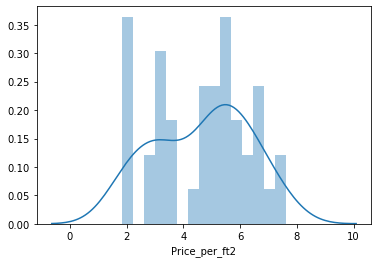

In [43]:
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=15)

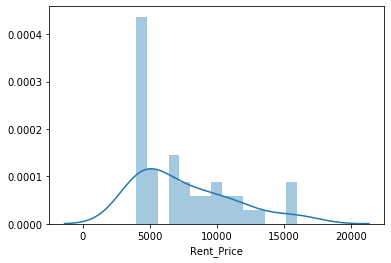

In [44]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

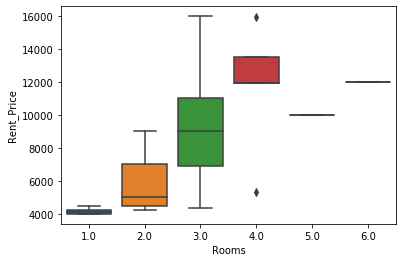

In [45]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent)

#### **The mean rental value of Manhattan is somewhere near 7000 dollar which is on a slighlty higher side than the budget of 5000 dollar**

## **Map of Manhattan apartments for rent**

### The popups will indicate the address and the monthly price for rent thus making it convenient to select the target appartment with the price condition estipulated (max US5000 )

In [46]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radius=6,popup=label,color='green',fill=True,fill_color='#2149xx',fill_opacity=0.7,parse_html=False).add_to(map_manhattan_rent)
    
map_manhattan_rent

## **Map of Manhattan showing the places for rent and the cluster of venues**

### **Now, one can point to a rental place for price and address location information while knowing the cluster venues around it.**

#### **This is an insightful way to explore rental possibilites**

In [47]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='green',
        fill=True,
        fill_color='#2149xx',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2

## **Now one can explore a particular rental place and its venues in detail**

### **In the map above, examination of appartments with rental place below 5000/month is straightforwad while knowing the venues around it.**

We could find an appartment with at the right price and in a location with desirable venues. The next step is to see if it is located near a subway metro station, in next cells work.

In [48]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


## **Mapping Manhattan Subway locations**

### Manhattan subway metro locations ( address) was obtained from webscrapping sites such as Wikipedia, Google and NY Metro Transit. For simplification, a csv file was produced from the 'numbers' (Apple excel ) so that the reading of this file is the starting point here.

#### **The geodata will be obtain via Nominatim using the algorythm below**

In [49]:
# A csv file summarized the subway station and the addresses for next step to determine geodata
mh=pd.read_csv('NYC_subway_list.csv')
mh.head()

,sub_station,sub_address
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA"
1,57 Street Subway Station,"New York, NY 10106, USA"
2,Broad St,"New York, NY 10005, USA"
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA"
4,5 Av and 53 St,"New York, NY 10022, USA"


## **Add colums labeled 'lat' and 'long' to be filled with geodata**

In [50]:
#  Add columns 'lat'  and 'long' to mh dataframe - with random temporary numbers to get started
sLength = len(mh['sub_station'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
mh = mh.assign(lat=lat.values)
mh = mh.assign(long=long.values)

### **Algorithm to find latitude and longitud for each subway metro station and add them to dataframe**

In [51]:
for n in range(len(mh)): 
    address= mh['sub_address'][n] 
    geolocator = Nominatim() 
    location = geolocator.geocode(address) 
    latitude = location.latitude 
    longitude = location.longitude 
    mh['lat'][n]=latitude 
    mh['long'][n]=longitude
    print(n,latitude,longitude)
    time.sleep(10)
    
print('Geodata completed')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jupyterlab/conda

0 40.8618571 -73.9245089
1 40.764201 -73.954413
2 40.7127281 -74.0060152
3 40.8479915 -73.939785
4 40.764201 -73.954413
5 40.7256842 -73.9977263
6 40.7587979 -73.9623427
7 40.7587979 -73.9623427
8 40.7202174 -73.99372
9 40.7530381632653 -74.0038601836735
10 40.764201 -73.954413
11 40.764201 -73.954413
12 40.7127281 -74.0060152
13 40.7587979 -73.9623427
14 40.764201 -73.954413
15 40.764201 -73.954413
16 40.7663058 -73.9601825
17 40.7127281 -74.0060152
18 40.7587979 -73.9623427
19 40.7127281 -74.0060152
20 40.7127281 -74.0060152
21 40.764201 -73.954413
22 40.764201 -73.954413
23 40.7127281 -74.0060152
24 40.764201 -73.954413
25 40.7127281 -74.0060152
26 40.7244125 -73.998317
27 40.8618571 -73.9245089
28 40.7127281 -74.0060152
29 40.764201 -73.954413
30 40.764201 -73.954413
31 40.764201 -73.954413
32 40.7127281 -74.0060152
33 40.7127281 -74.0060152
34 40.7401651 -73.9863046
35 40.764201 -73.954413
36 40.7127281 -74.0060152
37 40.764201 -73.954413
38 40.764201 -73.954413
39 41.50160425 -73

#### **Save dataframe to csv file**

In [52]:
mh.to_csv('MH_subway.csv',index=False)
mh.shape

(76, 4)

In [54]:
mh=pd.read_csv('MH_subway.csv')
print(mh.shape)
mh.head()

(76, 4)


,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764201,-73.954413
2,Broad St,"New York, NY 10005, USA",40.712728,-74.006015
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764201,-73.954413


In [55]:
# removing duplicate rows and creating new set mhsub1
mhsub1=mh.drop_duplicates(subset=['lat','long'], keep="last").reset_index(drop=True)
mhsub1.shape

(23, 4)

In [56]:
mhsub1.tail()

,sub_station,sub_address,lat,long
18,59 St-Lexington Av Station,"E 60th St, New York, NY 10065, USA",40.761412,-73.964322
19,57 Street Station,"New York, NY 10019, United States",40.764201,-73.954413
20,23 Street Station,"New York, NY 10010, United States",40.758798,-73.962343
21,14 Street / 8 Av,"New York, NY 10014, United States",40.712728,-74.006015
22,MTA New York City,"525 11th Ave, New York, NY 10018, USA",40.759809,-73.999282


## **MAP of Manhattan showing the location of subway stations¶**

In [57]:
# map subway stations 
# create map of Manhattan using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude=40.7308619
longitude=-73.9871558

map_mhsub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker([lat,lng],number_of_sides=6,radius=6,popup=label,color='red',fill_color='red',fill_opacity=2.5,).add_to(map_mhsub1)
map_mhsub1

## **Map of Manhattan showing places for rent and the subway locations nearby**
### Now, we can visualize the desirable rental places and their nearest subway station. Popups display rental address and monthly rental price and the subway station name.
#### Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a rental place to an specific subway station¶

In [58]:
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.785255,-73.947350
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [59]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#1234ab',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_manhattan_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_manhattan_rent

# **4.0 Results**

# **ONE CONSOLIDATE MAP**

### **Let's consolidate all the required inforamtion to make the apartment selection in one map**

## **Map of Manhattan with rental places, subway locations and cluster of venues**

## **Red dots are Subway stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues**

In [60]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_one)

map_mh_one

# **Problem Resolution - Select the apartment for rent**

## **The above consolidate map was used to explore options**
### **After examining, I have chosen two locations that meet the budget requirements of <=5000 US Dollars and minimimum 2 rooms which I will assess to make a choice**
- Apartment 1: 333 east 81st street, Rooms-3, Rent-4500 US Dollars, Cluster-0, Nearest subway-77th street Hudson
- Apartment 2: W 23RD ST, Area Chelsea, Rooms-2, Rent - 4250 US Dollars, Cluster-3, Nearest subway-34th street Hudson

# **Venues for Apartment 1 - Cluster 0**

In [61]:
## kk is the cluster number to explore
kk = 0
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hamilton Heights,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio
8,Upper East Side,Italian Restaurant,Exhibit,Art Gallery,Bakery,Coffee Shop,French Restaurant,Cocktail Bar,Juice Bar,Hotel,Boutique


# **Venues for Apartment 2 - Cluster 3**

In [62]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


# **Apartment Selection**

### Using the "one map" above, I was able to explore all possibilities since the popups provide the information needed for a good decision.

Apartment 1 rent cost is US4500 cheaper the budget US5000 with a extra room (total 3 room, my requirement is 2) than my requirement.Obviously that's my first choice initially. Now lets look at the other things.

- Apt 1 is located 487 meters from subway station at 77th Street. Venues for this apt are as of Cluster 0 and it is located on the Upper East side of Manhattan.It covers 2 neighborhoods - "Upper East Side" and "Hamilton Heights". The cluster neighborhood - "Upper East Side" has French, Italian restaurants, Coffee shops, Jucie Bar, Art Gallery etc, but being an Indian I have to visit the neighborhood of "Hamilton Heights" for Indian food as it is having the Indian restaurant.

- Apartment 2 rent cost is US4250, slightly cheaper and way low then the budget US5000 but having 2 rooms which is my actual requirement. 2nd choice because I'm getting an extra room for just 250US dollars in Apt1 with a semi-walkable Subway distance and all food/refreshment facilities with limited options. Apt 2 is located 567 meters from subway station at 34th Street slightly longer than the Apt1 option , but having immense food , hangout and refreshment options.
Though it's a bit far away from subway compared to Apt1 and I need to catch subway everyday to work, still not a non-walkable distance. Based on my 2 bedroom requirement with a cheaper option of rent and higher option of other facilities and having easy access to other neighborhoods, I have selected this place to stay

### **Based on current London venues, I feel that Cluster 2 type of venues is a closer resemblance to my current place. That means that APARTMENT 2 is a better choice along with lower monthly rent as a bonus, is worth the slight extra walk I have to do to reach the subway. Infact a bit more will make me more healthier.**

# **5.0 DISCUSSION**

### Very impressed with the overall organization, content and lab works presented during the Coursera IBM Certification Course

- I feel this Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned.
- I have become a Data Science enthusiast now, despite of not coming from this background at all.
- I feel I have acquired a good starting point to become a professional Data Scientist and I will continue exploring to creating examples of practical cases and in fact I want to apply the knowledge in one of my own personal project which I'm going to start by the Spring of 2020

# **6.0 CONCLUSIONS**

### I feel rewarded with the efforts, time and money spent. I believe this course with all the topics covered is well worthy of appreciation.

This project has shown me a practical application to resolve a real situation and in fact I want to apply the knowledge in one of my own personal project which I'm going to start by the Spring of 2020. I would recommend for use in similar situations.